# Decision Tree algorithm on UCI-Heart Disease Dataset

### Important Libraries

In [980]:
# Basic Numeral Libraries
import numpy as np
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Utility Modules
from pprint import pprint
import subprocess

# Sklearn Models and Helper Functions
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree as tr
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#### Loading the dataset

In [981]:
heart_disease_data = pd.read_csv("heart_disease_uci.csv")

### Dataset Information

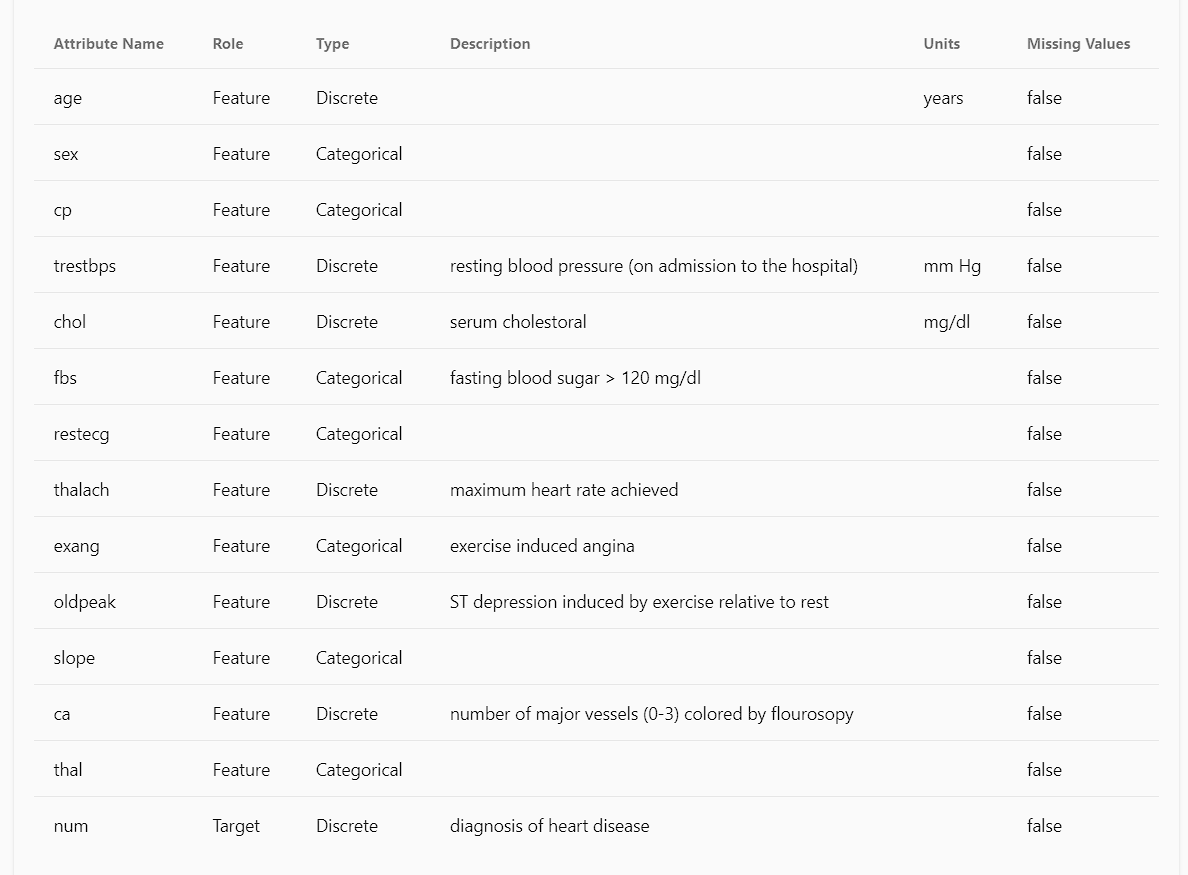

### Features in Heart-Disease 
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [982]:
heart_disease_data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [983]:
heart_disease_data.drop('id', axis = 1, inplace = True)

In [985]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 8)
heart_disease_data.head(10)

,age,sex,dataset,cp,...,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,...,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,...,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,...,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,...,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,...,upsloping,0.0,normal,0
5,56,Male,Cleveland,atypical angina,...,upsloping,0.0,normal,0
6,62,Female,Cleveland,asymptomatic,...,downsloping,2.0,normal,3
7,57,Female,Cleveland,asymptomatic,...,upsloping,0.0,normal,0
8,63,Male,Cleveland,asymptomatic,...,flat,1.0,reversable defect,2
9,53,Male,Cleveland,asymptomatic,...,downsloping,0.0,reversable defect,1


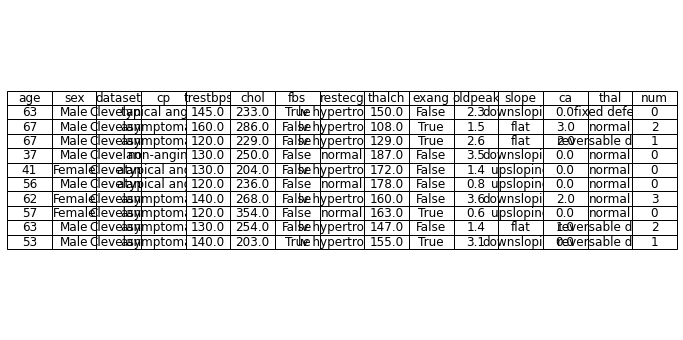

In [986]:
# Save the dataframe as a PNG image
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as per your preference
ax.axis('off')  # Hide axis labels

table = ax.table(cellText=heart_disease_data.head(10).values,
                 colLabels=heart_disease_data.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the scaling factor as per your preference

plt.savefig('heart_disease_data.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [984]:
pprint(heart_disease_data.columns)

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [24]:
dataset_counts = heart_disease_data['dataset'].value_counts()
pprint(dataset_counts)

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64


In [48]:
# since there are four datasets included here:
heart_disease_data.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

So, this heart disease dataset is complied from data collected from four different locations: Cleveland, Hungary, VA Long Beach and Switzerland

In [33]:
# Chest Pain has four types as follow
print(heart_disease_data['cp'].unique())
heart_disease_data['cp'].value_counts()

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

#### Dataset Statistics

In [39]:
heart_UCI_stats = heart_disease_data.describe()
print(heart_UCI_stats)

              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


The above information shows that there are values of null in 'trestbps', 'chol', 'thalch', 'oldpeak' and 'ca'

In [45]:
heart_disease_data['ca'].value_counts()
print(heart_disease_data['ca'])

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
915    NaN
916    NaN
917    NaN
918    NaN
919    NaN
Name: ca, Length: 920, dtype: float64


<b> The feature 'ca' as 'Number of major vessesl colored by fluoroscopy' </b><br>
Meaning: "number of major vessels colored by fluoroscopy" in the Heart Disease UCI dataset refers to the number of major blood vessels in the heart that were detected as having abnormal coloration during fluoroscopy, which is a medical imaging technique that uses X-rays to obtain real-time moving images of the internal structures of the body.

<b> NOTE: On assessing this particular feature, we observed that this column is sparse (presence of only 309 data / 920 data poitns), so this column is excluded from the dataset

#### Lets visualize the null values through heatmap

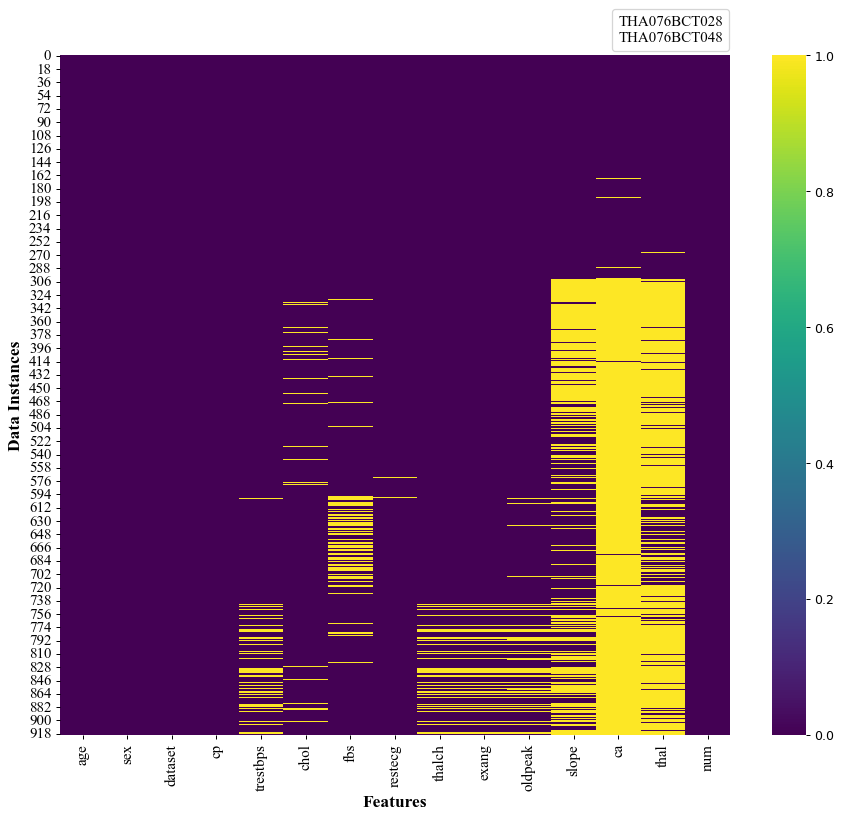

In [1006]:
plt.figure(figsize=(12, 10), dpi = 90)
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

ax = sns.heatmap(heart_disease_data.isnull(), cmap = 'viridis')
plt.tick_params(axis='both', which='both', labelsize = 10)
legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font)
legend_1.set_bbox_to_anchor((1.010, 1.08))

cbar = ax.collections[0].colorbar
cbar.ax.set_aspect(20)  # Adjust the value as needed to increase the gap

plt.xticks(rotation = 'vertical', font = font_xticks)
plt.yticks(font = font_yticks)
plt.xlabel("Features", font = font_label)
plt.ylabel("Data Instances", font = font_label)
plt.savefig('./Figures/Null features.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [1007]:
print("Count of null values in 'slope': ", heart_disease_data['slope'].isnull().sum())
print("Count of null values in 'ca': ", heart_disease_data['ca'].isnull().sum())
print("Count of null values in 'thal': ", heart_disease_data['thal'].isnull().sum())

Count of null values in 'slope':  309
Count of null values in 'ca':  611
Count of null values in 'thal':  486


After clear inspection, we got to know that this dataset has been taken from 4 location, and the data for ca, slope and thal features are either part of only one loaction or more than one, but not all the location, due to which the values in for those location are null. <br>
<b> So, the 'slope', 'ca', and 'thal' columnn are to be dropped from the data frame. </b>

In [1008]:
heart_disease_data.drop(['slope', 'ca', 'thal'], axis = 1, inplace = True)

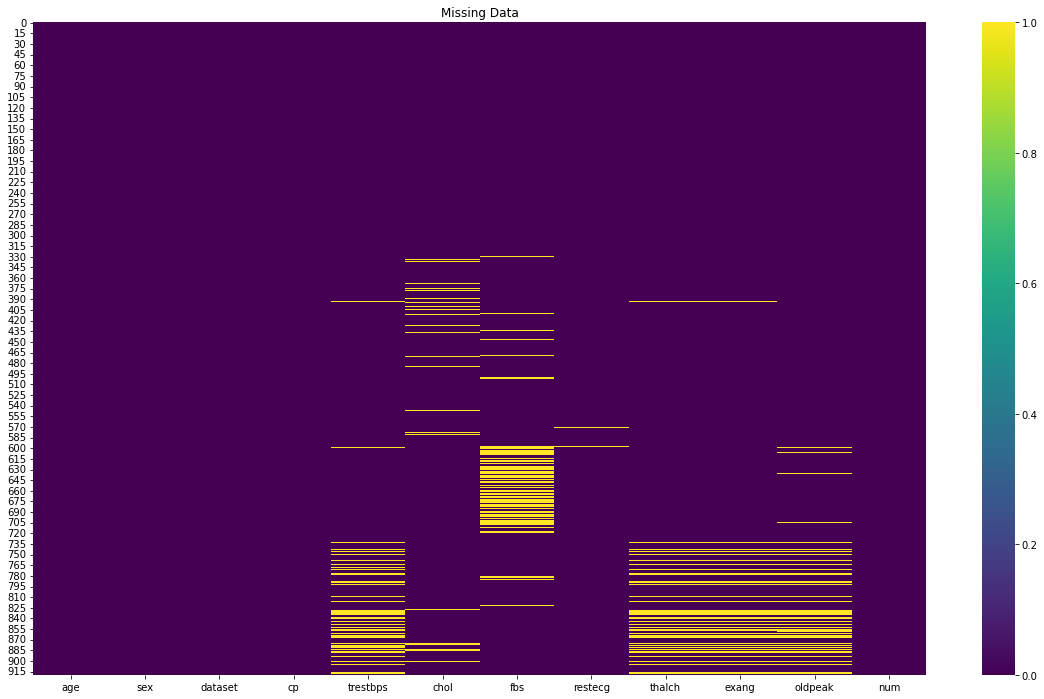

In [1009]:
sns.heatmap(heart_disease_data.isnull(), cmap='viridis')
plt.title('Missing Data')
plt.show()

Still there are missing data in "trestbps", "chol", "fbs", "thalch", "exang", "oldpeak" <br>

In [1010]:
heart_disease_data.head(3)

,age,sex,dataset,cp,...,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,...,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,...,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,...,129.0,True,2.6,1


#### Filling 'null' or 'nan' values using two techniques: mean value and forward fill

In [1011]:
trestbps_mean_value = heart_disease_data['trestbps'].mean()
chol_mean_value = heart_disease_data['chol'].mean()
fbs_mean_value = heart_disease_data['fbs'].mean()
thalch_mean_value = heart_disease_data['thalch'].mean()
exang_mean_value = heart_disease_data['exang'].mean()
oldpeak_mean_value = heart_disease_data['oldpeak'].mean()

heart_disease_data['trestbps'] = heart_disease_data['trestbps'].fillna(trestbps_mean_value)
heart_disease_data['chol'] = heart_disease_data['chol'].fillna(chol_mean_value)
heart_disease_data['fbs'] = heart_disease_data['fbs'].fillna(fbs_mean_value)
heart_disease_data['thalch'] = heart_disease_data['thalch'].fillna(thalch_mean_value)
heart_disease_data['exang'] = heart_disease_data['exang'].fillna(exang_mean_value)
heart_disease_data['oldpeak'] = heart_disease_data['oldpeak'].fillna(oldpeak_mean_value)

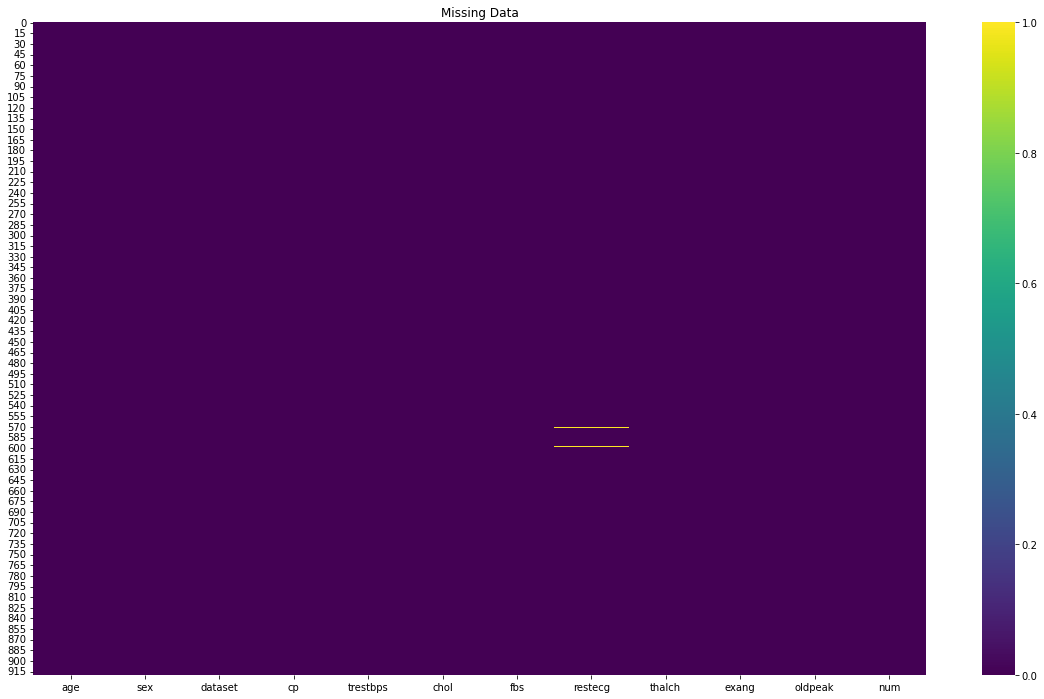

In [1013]:
sns.heatmap(heart_disease_data.isnull(), cmap='viridis')
plt.title('Missing Data')
plt.show()

<b> Hence, there are no null values in the modified dataset now, leaving us with 11 input feaures 

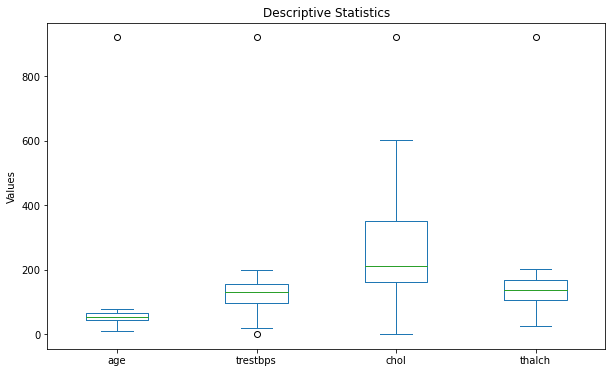

In [1014]:
heart_UCI_stats = heart_disease_data.describe()
heart_UCI_stats = heart_UCI_stats[['age', 'trestbps', 'chol', 'thalch']]

# Plotting the descriptive statistics using a box plot
heart_UCI_stats.plot(kind='box', figsize=(10, 6))

# Set labels and title
plt.ylabel('Values')
plt.title('Descriptive Statistics')

# Display the plot
plt.show()

Box plot for numerical atributes (continuous attributes)

In [1015]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    object 
 10  oldpeak   920 non-null    float64
 11  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [1016]:
heart_disease_data[heart_disease_data['restecg'].isnull()]

,age,sex,dataset,cp,...,thalch,exang,oldpeak,num
571,55,Male,Hungary,typical angina,...,136.0,False,0.0,1
598,34,Male,Switzerland,asymptomatic,...,154.0,False,0.2,1


<b>NOTE:  This shows that thes eis still NaN values in the 'restecg'

In [1017]:
heart_disease_data['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [1018]:
heart_disease_data['restecg'] = heart_disease_data['restecg'].fillna('normal')

Since, 'restecg' is a categorical attribute so filling the 'NaN' values with 'normal' under majority condition.

<Figure size 720x720 with 0 Axes>

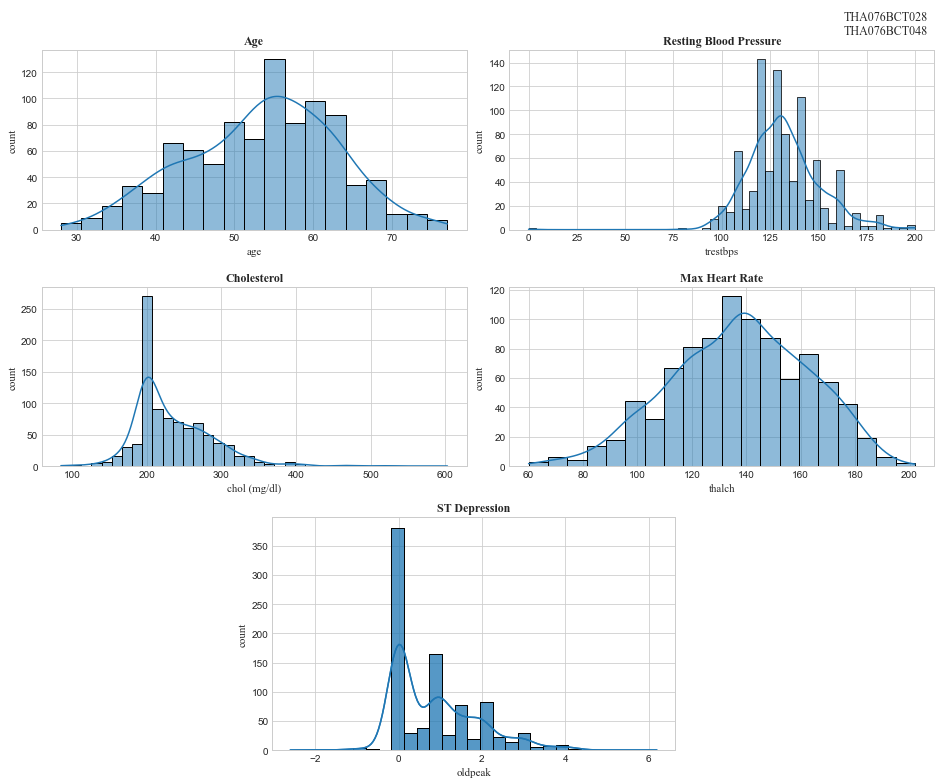

In [1111]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)
font_title = FontProperties(family='Times New Roman', size = 12, weight = 'bold')
font_xlabel = FontProperties(family='Times New Roman', size = 11)
font_ylabel = FontProperties(family='Times New Roman', size = 11)


plt.figure(figsize = (8, 8), dpi = 90)
# Create the figure and subplots
fig, axes = plt.subplots(3, 2)

# Plot the histograms with KDE for each column
sns.histplot(heart_disease_data.iloc[:, :-1], x='age', kde=True, ax=axes[0, 0])
sns.histplot(heart_disease_data.iloc[:, :-1], x='trestbps', kde=True, ax=axes[0, 1])
sns.histplot(heart_disease_data.iloc[:, :-1], x='chol', kde=True, ax=axes[1, 0])
sns.histplot(heart_disease_data.iloc[:, :-1], x='thalch', kde=True, ax=axes[1, 1])
sns.histplot(heart_disease_data.iloc[:, :-1], x='oldpeak', kde=True, ax=axes[2, 0])

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Set individual subplot titles
axes[0, 0].set_title('Age', font = font_title )
axes[0, 1].set_title('Resting Blood Pressure', font = font_title)
axes[1, 0].set_title('Cholesterol', font = font_title)
axes[1, 1].set_title('Max Heart Rate', font = font_title)
axes[2, 0].set_title('ST Depression', font = font_title)

axes[0, 0].set_xlabel('age', font = font_xlabel )
axes[0, 1].set_xlabel('trestbps', font = font_xlabel)
axes[1, 0].set_xlabel('chol (mg/dl)', font = font_xlabel)
axes[1, 1].set_xlabel('thalch', font = font_xlabel)
axes[2, 0].set_xlabel('oldpeak', font = font_xlabel)

axes[0, 0].set_ylabel('count', font = font_ylabel)
axes[0, 1].set_ylabel('count', font = font_ylabel)
axes[1, 0].set_ylabel('count', font = font_ylabel)
axes[1, 1].set_ylabel('count', font = font_ylabel)
axes[2, 0].set_ylabel('count', font = font_ylabel)

legend_1 = axes[0, 1].legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font)
legend_1.set_bbox_to_anchor((1.010, 1.28))


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.32, wspace=0.1)

# Adjust the position of the last plot
last_plot = sns.histplot(heart_disease_data.iloc[:, :-1], x='oldpeak', kde=True, ax=axes[2, 0])
last_plot.set_position([0.325, 0.07, 0.35, 0.27])  # Adjust the position as needed
plt.savefig('./Figures/histogram_plot.png', dpi = 300, bbox_inches = 'tight')
# Display the plot
plt.show()

In [1053]:
heart_disease_data[heart_disease_data['chol'] == 0]

,age,sex,dataset,cp,...,thalch,exang,oldpeak,num
597,32,Male,Switzerland,typical angina,...,127.000000,False,0.700000,1
598,34,Male,Switzerland,asymptomatic,...,154.000000,False,0.200000,1
599,35,Male,Switzerland,asymptomatic,...,130.000000,True,0.878788,3
600,36,Male,Switzerland,asymptomatic,...,125.000000,True,1.000000,1
601,38,Female,Switzerland,asymptomatic,...,166.000000,False,2.800000,2
602,38,Female,Switzerland,asymptomatic,...,156.000000,False,0.000000,1
603,38,Male,Switzerland,non-anginal,...,179.000000,False,-1.100000,0
604,38,Male,Switzerland,non-anginal,...,128.000000,True,0.000000,1
605,38,Male,Switzerland,asymptomatic,...,150.000000,False,0.000000,2
606,38,Male,Switzerland,asymptomatic,...,120.000000,True,0.878788,1


<b>After observing this, what we got is that for 172 instances, the serum cholestrol value is 0.0, which is humanly impossible, so these values need to be replace with mean value

In [1054]:
chol_mean_value = heart_disease_data['chol'].mean()
heart_disease_data['chol'] = heart_disease_data['chol'].replace(0.0, chol_mean_value)

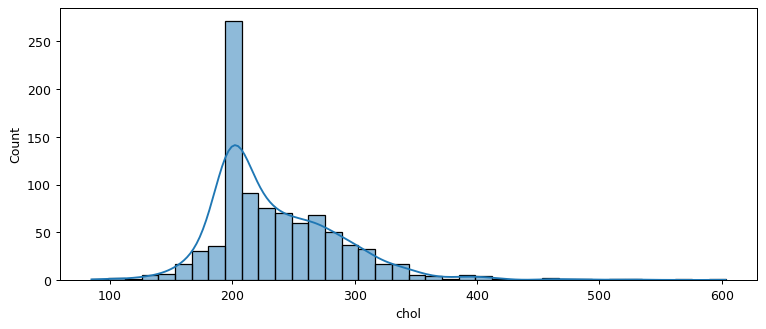

In [1055]:
plt.figure(figsize = (10, 4), dpi = 90)
sns.histplot(heart_disease_data.iloc[:, :-1], x='chol', kde=True)
plt.show()

#### Since, the target variable has four classes: lets convert it into either having heart disease or not having it

In [1056]:
heart_disease_data['num']=np.where(heart_disease_data['num']>0,1,0)

#### Taking Variable (X) as input features and Variable (y) as target variable

In [1057]:
X = heart_disease_data.iloc[:, :-1]
y = heart_disease_data.iloc[:, -1]

In [1058]:
X.head(2)

,age,sex,dataset,cp,...,restecg,thalch,exang,oldpeak
0,63,Male,Cleveland,typical angina,...,lv hypertrophy,150.0,False,2.3
1,67,Male,Cleveland,asymptomatic,...,lv hypertrophy,108.0,True,1.5


In [1059]:
X.drop('dataset', axis  = 1, inplace = True)

#### Convert Categorical to Numerical Values using LabelEncoder()

In [1060]:
# Using Label Encoder to convert categorical to numerical values:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'dataset']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']
label_encoder_dict = {}
for category in categorical_features:
    label_encoder_dict[category] = LabelEncoder()
    X[category] = label_encoder_dict[category].fit_transform(X[category])

In [1061]:
X.head(5)

,age,sex,cp,trestbps,...,restecg,thalch,exang,oldpeak
0,63,1,3,145.0,...,0,150.0,0,2.3
1,67,1,0,160.0,...,0,108.0,2,1.5
2,67,1,0,120.0,...,0,129.0,2,2.6
3,37,1,2,130.0,...,1,187.0,0,3.5
4,41,0,1,130.0,...,0,172.0,0,1.4


In [1062]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [1063]:
print("X Training size: ", len(X_train))
print("y Training size: ", len(y_train))
print("X Testing size: ", len(X_test))
print("y Testing size: ", len(y_test))

X Training size:  690
y Training size:  690
X Testing size:  230
y Testing size:  230


In [1112]:
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 17, max_depth = 4, min_samples_leaf = 5)
DT_model.fit(X = X_train, y = y_train)

y_pred = DT_model.predict(X_test)
print("Accuracy score using 'entropy' as impurity (test): ", accuracy_score(y_true = y_test, y_pred = y_pred))
print("Accuracy score using 'entropy' as impurity (train): ", accuracy_score(y_true = y_train, y_pred = DT_model.predict(X_train)))

Accuracy score using 'entropy' as impurity (test):  0.7434782608695653
Accuracy score using 'entropy' as impurity (train):  0.7985507246376812


The decision tree classifier model was first fitted on the dataset, the accuracy score obtained on this set was 74% on the test set and then 79% on the training set. 

In [1114]:
print(classification_report(y_pred = DT_model.predict(X_test), y_true = y_test))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       102
           1       0.74      0.83      0.78       128

    accuracy                           0.74       230
   macro avg       0.74      0.73      0.74       230
weighted avg       0.74      0.74      0.74       230



In [1120]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
#     if key not in ['accuracy', 'macro avg', 'weighted avg']:
    if key == 'accuracy':
        print(value)
    if not isinstance(value, float):
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df.to_excel('entropy_based_clf.xlsx', index=True)

0.7434782608695653


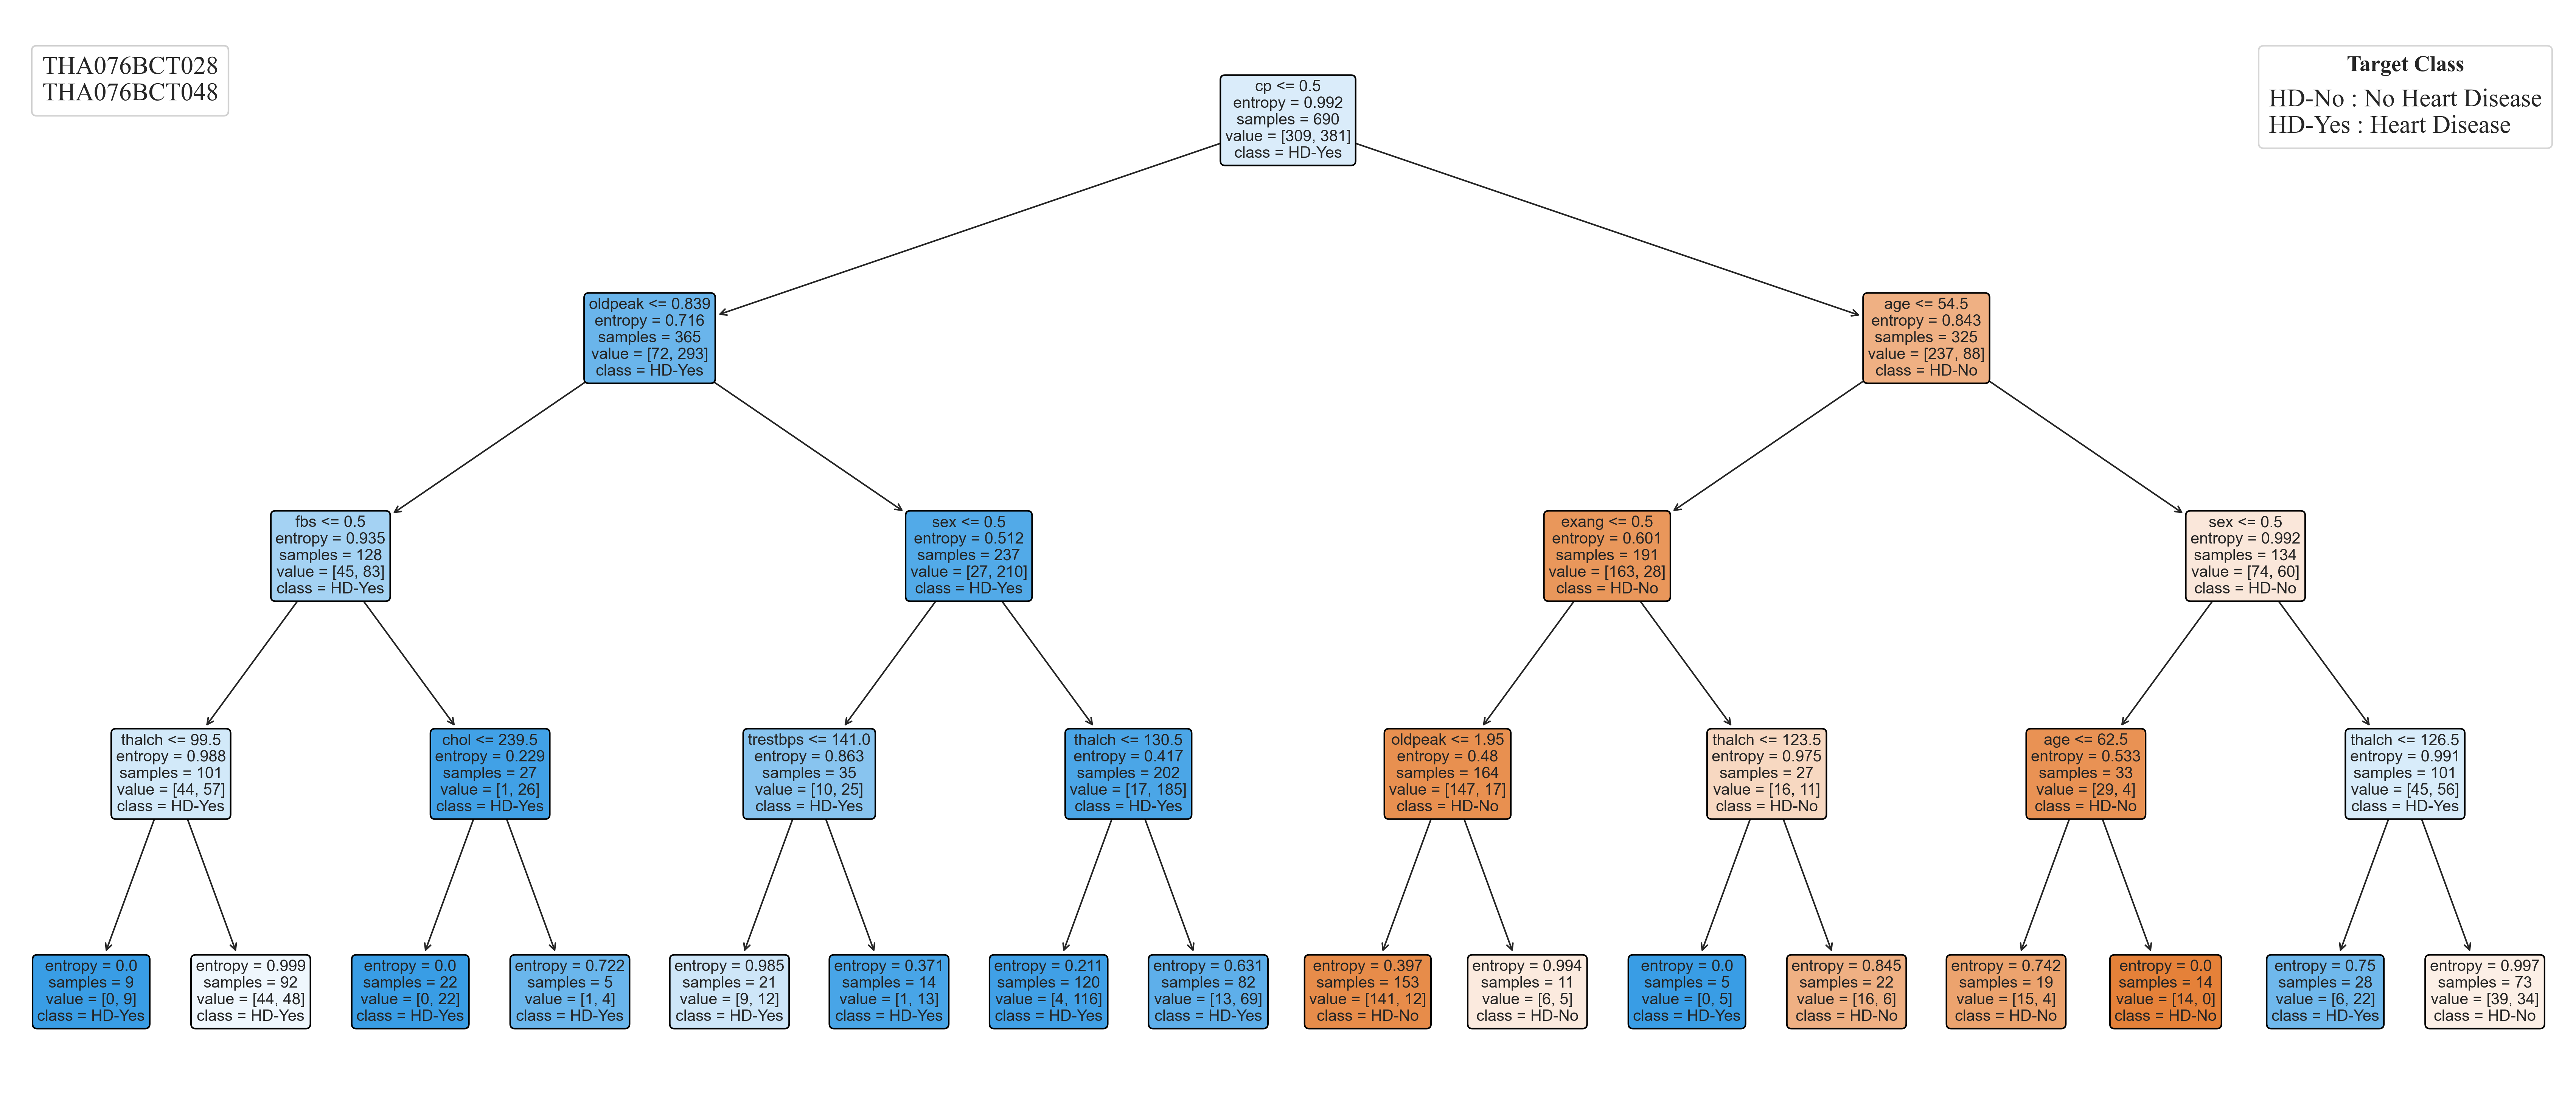

In [1121]:
font = FontProperties(family='Times New Roman', size = 16)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

ax = plt.figure(figsize=(25, 12), dpi = 300)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
features = X.columns
classes = ['HD-No','HD-Yes']

tr.plot_tree(
    DT_model,
    filled=True,
    rounded=True,
    feature_names=features,
    class_names=classes,
    fontsize = 10
)


legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['HD-No : No Heart Disease\nHD-Yes : Heart Disease'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_1.set_bbox_to_anchor((1.0, 0.98))
legend_1.set_title("Target Class", prop=font_label) 
ax.add_artist(legend_1)

    
legend_2 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_2.set_bbox_to_anchor((0.09, 0.98))
ax.add_artist(legend_2)

plt.savefig("./Figures/tree_entropy.png", dpi = 300, bbox_inches = 'tight')
plt.show()

<b> This is very low for a classifier algorithm, so using GridSearch and Stratigied K-fold Cross-validation

In [851]:
decision_tree = DecisionTreeClassifier(criterion='entropy') 

best_parameters = {'max_depth': np.arange(2, 10), 'min_samples_leaf': np.arange(2, 10)}
# for information gain and entropy
model_entropy = GridSearchCV(estimator = decision_tree, param_grid = best_parameters, n_jobs=-1, verbose = 0, cv = StratifiedKFold(n_splits = 4, shuffle=True, random_state = 17))
model_entropy.fit(X_train, y_train)

print(model_entropy.best_params_)
print("Model accuracy score on Train set: ", model_entropy.best_score_)
y_pred = model_entropy.predict(X_test)
print(f"Accuracy after GridSearch & Stratified K-fold: ", accuracy_score(y_true = y_test, y_pred = y_pred))

{'max_depth': 6, 'min_samples_leaf': 4}
Model accuracy score on Train set:  0.7738607339696195
Accuracy after GridSearch & Stratified K-fold:  0.7652173913043478


{'max_depth': 6, 'min_samples_leaf': 6} <br>
Model accuracy score on Train set:  0.7724492539319802 <br>
Accuracy after GridSearch & Stratified K-fold 0.7652173913043478

In [854]:
print("Hyper-parameter tuned (train set): ", accuracy_score(y_true = y_train, y_pred = model_entropy.predict(X_train)))
print(f"Hyper-paramter tuned (test set): ", accuracy_score(y_true = y_test, y_pred = y_pred))

Hyper-parameter tuned (train set):  0.8507246376811595
Hyper-paramter tuned (test set):  0.7652173913043478


So, we found that using GridSearchCV with Stratified K-fold (4 folds), the accuracy improve by 2%. But there is sign of overfitting the decision tree on the training dataset. So, the technique of prunning should be used. 

In [855]:
y_train_pred_entropy = model_entropy.best_estimator_.predict(X_train)
y_test_pred_entropy = model_entropy.best_estimator_.predict(X_test)

In [856]:
def plot_confusion_matrix(y_pred, y_true, dom):
    print(f'{dom} Confusion matrix')
    plt.figure(figsize = (6, 4))
    cf = confusion_matrix(y_pred = y_pred, y_true = y_true)
    sns.heatmap(cf, annot=True, yticklabels = classes
               ,xticklabels = classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.8217391304347826
Test score 0.7652173913043478
Train Confusion matrix


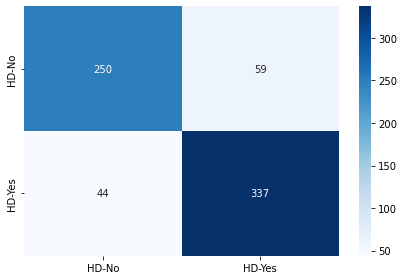

Test Confusion matrix


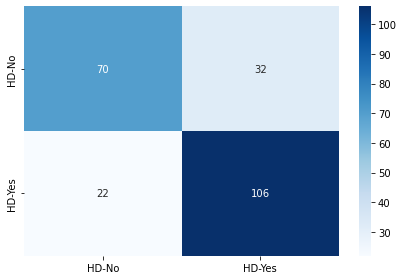

In [857]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusion_matrix(y_train_pred_entropy, y_train,dom = 'Train')
plot_confusion_matrix(y_test_pred_entropy, y_test,dom = 'Test')

In [858]:
print(classification_report(y_pred = y_test_pred_entropy, y_true = y_test))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       102
           1       0.77      0.83      0.80       128

    accuracy                           0.77       230
   macro avg       0.76      0.76      0.76       230
weighted avg       0.76      0.77      0.76       230



In [1122]:
classification_rep = classification_report(y_true = y_test, y_pred = y_test_pred_entropy, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
#     if key not in ['accuracy', 'macro avg', 'weighted avg']:
    if key == 'accuracy':
        print(value)
    if not isinstance(value, float):
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df.to_excel('hyperparameter-t.xlsx', index=True)

0.7652173913043478


### Confusion Map

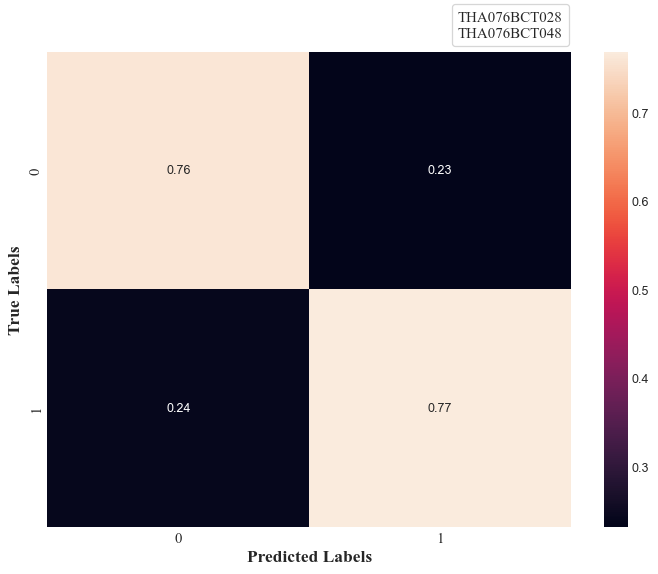

In [1124]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)
cm = confusion_matrix(y_true = y_test, y_pred = y_test_pred_entropy)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]

fig = plt.figure(figsize = (8, 6), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels',  font = font_label)
plt.ylabel('True Labels',  font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_xticks)

legend_1 = fig.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop = font, frameon = True)
legend_1.set_bbox_to_anchor((0.80, 1.07))

plt.tight_layout()

plt.savefig('./Figures/CM_ENTROPY_HYPERPARAMETER.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### The necessity of prunning Decision Tree

In [859]:
prune_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 10, min_samples_split=10)
prune_clf.fit(X_train,y_train)
y_train_pred_prune = prune_clf.predict(X_train)
y_test_pred_prune = prune_clf.predict(X_test)

In [860]:
print(f'Train score {accuracy_score(y_train_pred_prune, y_train)}')
print(f'Test score {accuracy_score(y_test_pred_prune, y_test)}')

Train score 0.9014492753623189
Test score 0.7652173913043478


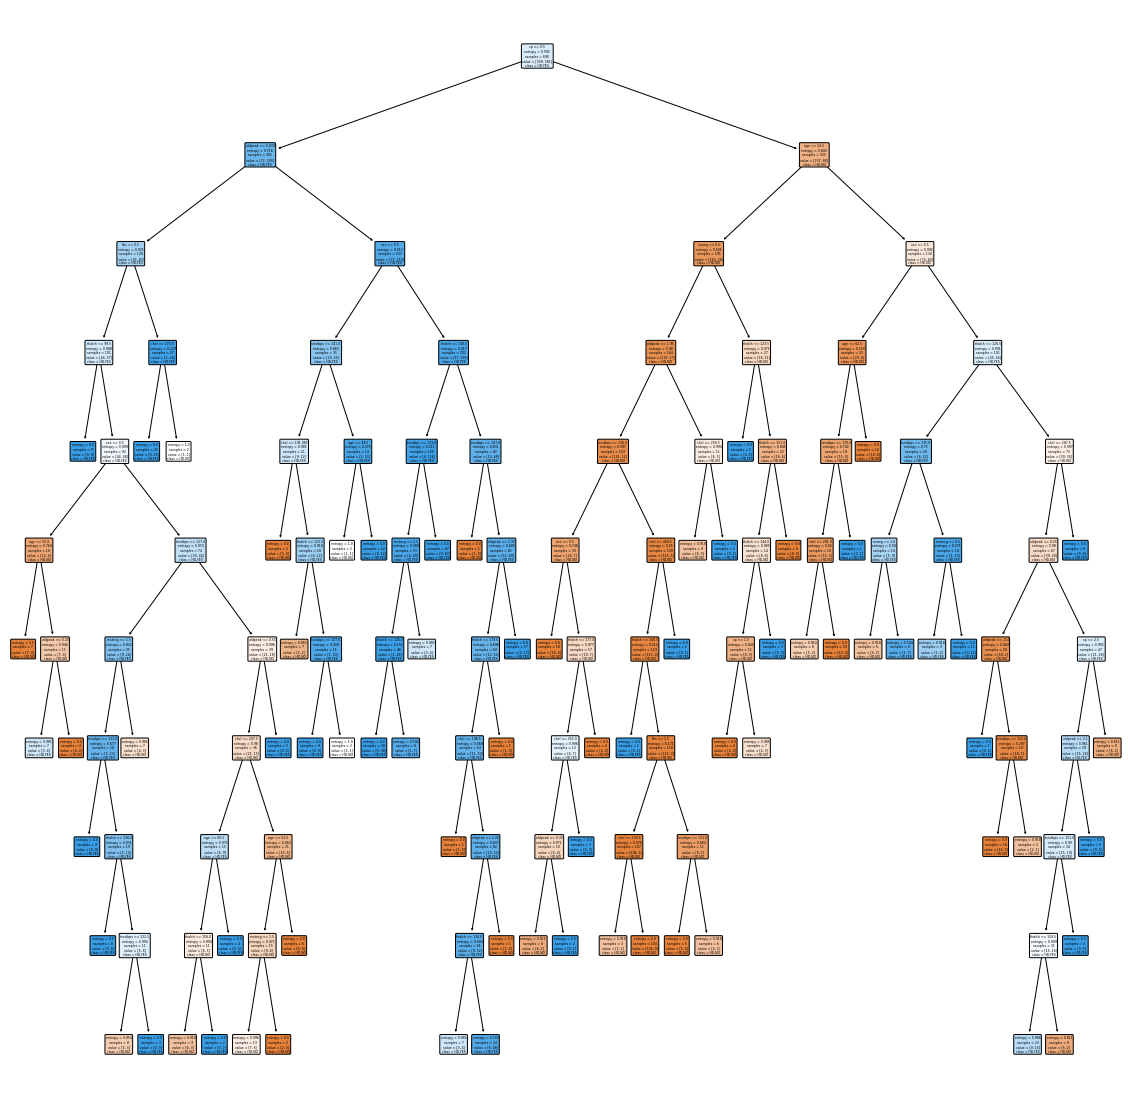

In [703]:
plt.figure(figsize=(20,20))
features = X.columns
classes = ['HD-NO','HD-YES']
tr.plot_tree(prune_clf, feature_names=features, class_names=classes,filled=True, rounded = True)
plt.show()

In [861]:
path = prune_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00234754 0.00291978 0.00329981 0.00348154 0.00353966
 0.00377093 0.00379893 0.00386909 0.00386909 0.00388845 0.00410792
 0.00419867 0.00429937 0.0046337  0.00466562 0.00468522 0.00468833
 0.0046897  0.00472304 0.00478096 0.00497035 0.00503811 0.00515666
 0.00519404 0.00529141 0.00532123 0.00540281 0.00604425 0.00646423
 0.00651353 0.00682882 0.00696308 0.00714006 0.00830001 0.00875505
 0.01016157 0.0102044  0.01040789 0.01118355 0.01120361 0.0114712
 0.01407571 0.01996836 0.02206567 0.02970202 0.03775477 0.2162974 ]


In [862]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

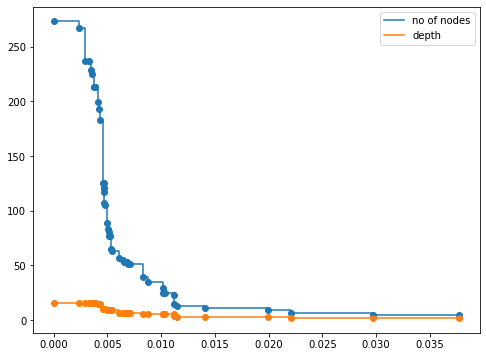

In [863]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize = (8, 6))
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

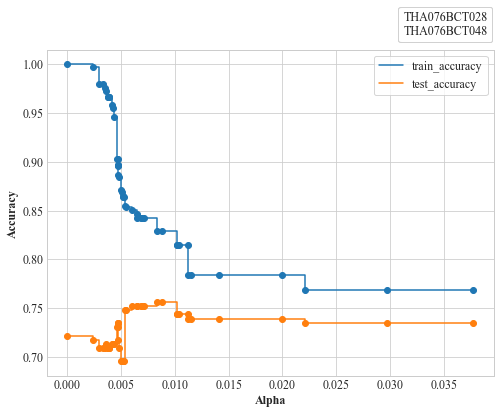

In [1109]:
plt.style.use('seaborn-whitegrid')
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

train_acc = []
test_acc = []
cl_alphas = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    cl_alphas.append(c)

ax = plt.figure(figsize = (8, 6))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")

# Customize the legend
legend = plt.legend(markerscale=2, prop = font, frameon = True)
legend.set_bbox_to_anchor((1.0, 1.0))
 # Remove legend border

ax.add_artist(legend)
    
legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_1.set_bbox_to_anchor((1.01, 1.15))
ax.add_artist(legend_1)

plt.xlabel('Alpha', font = font_label)
plt.ylabel('Accuracy', font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig("./Figures/accuracy_vs_alphas_entropy.png", dpi = 300, bbox_inches = 'tight')

plt.show()

In [871]:
clf_after_prune = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, ccp_alpha = 0.008)
clf_after_prune.fit(X_train,y_train)
y_train_pred = clf_after_prune.predict(X_train)
y_test_pred = clf_after_prune.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')

Train score 0.8289855072463768
Test score 0.7565217391304347


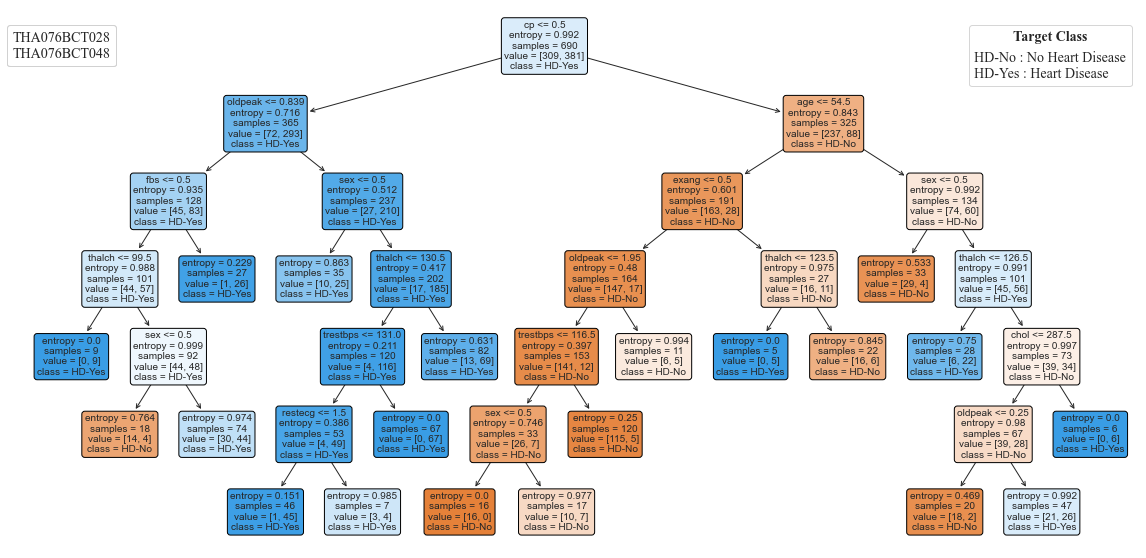

In [1135]:
font = FontProperties(family='Times New Roman', size = 14)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

ax = plt.figure(figsize=(20, 10))
# plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
features = X.columns
classes = ['HD-No','HD-Yes']

tr.plot_tree(
    clf_after_prune,
    filled=True,
    rounded=True,
    feature_names=features,
    class_names=classes,
    fontsize = 10
)

legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['HD-No : No Heart Disease\nHD-Yes : Heart Disease'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_1.set_bbox_to_anchor((1.0, 0.98))
legend_1.set_title("Target Class", prop=font_label) 
ax.add_artist(legend_1)

    
legend_2 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_2.set_bbox_to_anchor((0.09, 0.98))
ax.add_artist(legend_2)

plt.savefig("./Figures/pruned_entropy_decision_tree.png", dpi = 300, bbox_inches = 'tight')
plt.show()
plt.show()

#### Doing the same classifier tasks using 'Gini' index

In [902]:
gini_clf = DecisionTreeClassifier(criterion = 'gini', random_state = 17, max_depth = 4, min_samples_leaf = 5)
gini_clf.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=17)

In [903]:
y_pred_gini = gini_clf.predict(X_test)
print("Accuracy using 'gini' as impurity (train): ", accuracy_score(y_true = y_train, y_pred = gini_clf.predict(X_train)))
print("Accuracy using 'gini' impurity (test)", accuracy_score(y_true = y_test, y_pred = y_pred_gini))

Accuracy using 'gini' as impurity (train):  0.8217391304347826
Accuracy using 'gini' impurity (test) 0.7521739130434782


In [1139]:
classification_rep = classification_report(y_test, y_pred = y_pred_gini, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
#     if key not in ['accuracy', 'macro avg', 'weighted avg']:
    if key == 'accuracy':
        print(value)
    if not isinstance(value, float):
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df.to_excel('gini_based_clf.xlsx', index=True)

0.7521739130434782


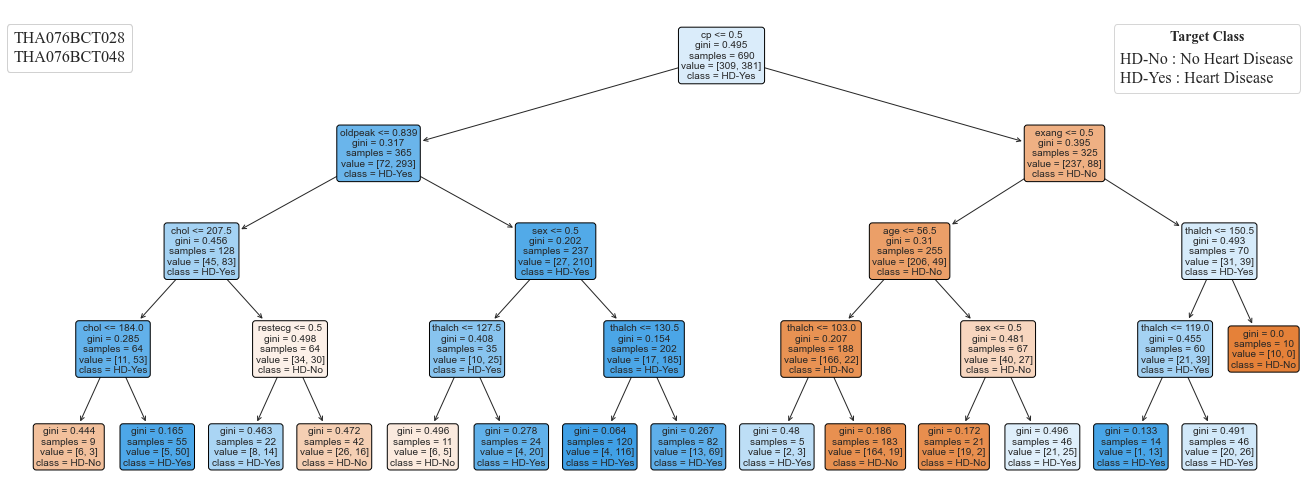

In [1138]:
font = FontProperties(family='Times New Roman', size = 16)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

ax = plt.figure(figsize=(23, 9))
# plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
features = X.columns
classes = ['HD-No','HD-Yes']

tr.plot_tree(
    gini_clf,
    filled=True,
    rounded=True,
    feature_names=features,
    class_names=classes,
    fontsize = 10
)


legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['HD-No : No Heart Disease\nHD-Yes : Heart Disease'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_1.set_bbox_to_anchor((1.0, 0.98))
legend_1.set_title("Target Class", prop=font_label) 
ax.add_artist(legend_1)

    
legend_2 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_2.set_bbox_to_anchor((0.09, 0.98))
ax.add_artist(legend_2)

plt.savefig("./Figures/tree_gini.png", dpi = 300, bbox_inches = 'tight')
plt.show()

#### Using GridSearchCV and Stratified K-fold for better result

In [920]:
gini_decision_tree = DecisionTreeClassifier(criterion='gini') 
best_parameters = {'max_depth': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 3)}
# for information gain and entropy
model_gini = GridSearchCV(estimator = gini_decision_tree, param_grid = best_parameters, n_jobs=-1, verbose = 0, cv = StratifiedKFold(n_splits = 4, shuffle=True, random_state = 17))
model_gini.fit(X_train, y_train)

print(model_gini.best_params_)
print("Model accuracy score on Train set: ", model_gini.best_score_)
y_pred = model_gini.predict(X_test)
print(f"Accuracy after GridSearch & Stratified K-fold", accuracy_score(y_true = y_test, y_pred = y_pred))

{'max_depth': 4, 'min_samples_leaf': 2}
Model accuracy score on Train set:  0.7666437021104987
Accuracy after GridSearch & Stratified K-fold 0.7782608695652173


In [922]:
print("Hyper-parameter tuned (train set): ", accuracy_score(y_true = y_train, y_pred = model_gini.predict(X_train)))
print(f"Hyper-paramter tuned (test set): ", accuracy_score(y_true = y_test, y_pred = y_pred))

Hyper-parameter tuned (train set):  0.8246376811594203
Hyper-paramter tuned (test set):  0.7782608695652173


So, here we can clearly observer that on fine-tuning, we get that the accuracy on train_set is 82.46 % whereas on the test test is 77.82 %, which is actually better then the result on 'entropy'

In [1142]:
classification_rep = classification_report(y_test, y_pred = model_gini.predict(X_test), output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
#     if key not in ['accuracy', 'macro avg', 'weighted avg']:
    if key == 'accuracy':
        print(value)
    if not isinstance(value, float):
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df.to_excel('hyperparameter_gini_based_clf.xlsx', index=True)

0.7782608695652173


Train score 0.8246376811594203
Test score 0.7782608695652173
Train Confusion matrix


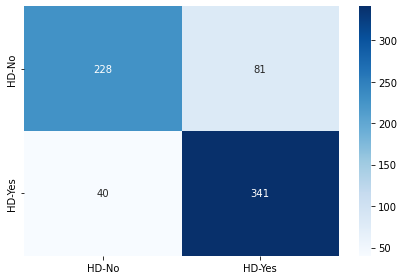

Test Confusion matrix


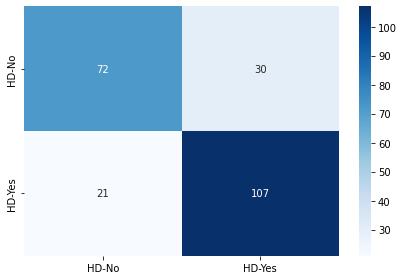

In [923]:
y_train_pred_gini = model_gini.best_estimator_.predict(X_train)
y_test_pred_gini = model_gini.best_estimator_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred_gini, y_train)}')
print(f'Test score {accuracy_score(y_test_pred_gini, y_test)}')
plot_confusion_matrix(y_train_pred_gini, y_train, dom='Train')
plot_confusion_matrix(y_test_pred_gini, y_test,dom='Test')

In [924]:
print(classification_report(y_pred = y_test_pred_gini, y_true = y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       102
           1       0.78      0.84      0.81       128

    accuracy                           0.78       230
   macro avg       0.78      0.77      0.77       230
weighted avg       0.78      0.78      0.78       230



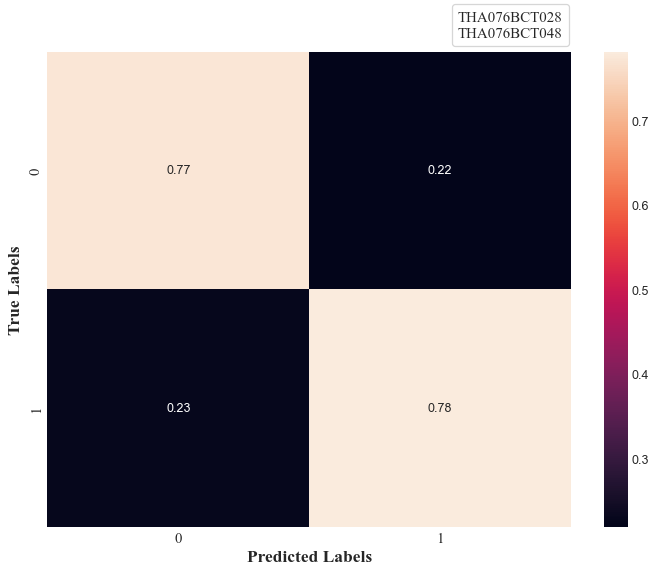

In [1143]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)
cm = confusion_matrix(y_true = y_test, y_pred = y_test_pred_gini)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]

fig = plt.figure(figsize = (8, 6), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels',  font = font_label)
plt.ylabel('True Labels',  font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_xticks)

legend_1 = fig.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop = font, frameon = True)
legend_1.set_bbox_to_anchor((0.80, 1.07))

plt.tight_layout()

plt.savefig('./Figures/cm_gini_hyperparameter.png', dpi = 300, bbox_inches = 'tight')
plt.show()

#### Using pruning on 'Gini'

In [925]:
prune_clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth = 10, min_samples_split=10)
prune_clf_gini.fit(X_train,y_train)
y_train_pred_prune_gini = prune_clf_gini.predict(X_train)
y_test_pred_prune_gini = prune_clf_gini.predict(X_test)
print(f'Train score {accuracy_score(y_train_pred_prune_gini, y_train)}')
print(f'Test score {accuracy_score(y_test_pred_prune_gini, y_test)}')

Train score 0.9115942028985508
Test score 0.7347826086956522


In [926]:
path = prune_clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_gini, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas_gini)

[0.         0.0004683  0.0005083  0.00058891 0.00065394 0.00070268
 0.00071146 0.00072842 0.00074322 0.00077755 0.00081363 0.00090177
 0.00104973 0.00118577 0.00118577 0.00118577 0.00132613 0.0014533
 0.00164213 0.00168491 0.00175887 0.00177985 0.00186649 0.00188328
 0.00196656 0.0019675  0.0019887  0.00219587 0.00243986 0.0026087
 0.00264991 0.00269151 0.00272805 0.00295205 0.00317398 0.00335282
 0.00338869 0.00338881 0.00351171 0.00364863 0.00400794 0.00420635
 0.00459022 0.00485182 0.00743165 0.00839663 0.01049689 0.01170834
 0.01197917 0.01360441 0.02120744 0.14102079]


In [927]:
# For each alpha we will append our model to a list
clfs_gini = []
for ccp_alpha in ccp_alphas_gini:
    clf = DecisionTreeClassifier(criterion = 'gini', random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_gini.append(clf)

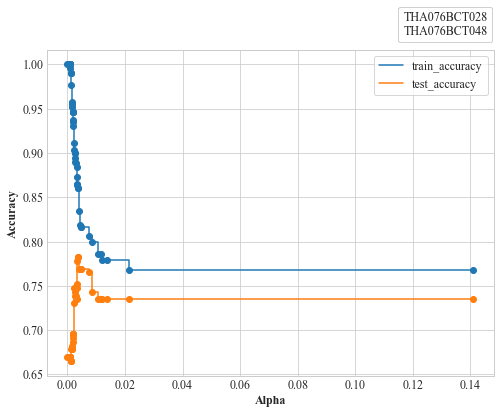

In [1108]:
plt.style.use('seaborn-whitegrid')
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 12, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

train_acc = []
test_acc = []
for c in clfs_gini:
    y_train_prediction = c.predict(X_train)
    y_test_prediction = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_prediction, y_train))
    test_acc.append(accuracy_score(y_test_prediction, y_test))

ax = plt.figure(figsize = (8, 6))
plt.scatter(ccp_alphas_gini,train_acc)
plt.scatter(ccp_alphas_gini,test_acc)
plt.plot(ccp_alphas_gini,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas_gini,test_acc,label='test_accuracy',drawstyle="steps-post")

# Customize the legend
legend = plt.legend(markerscale=2, prop = font, frameon = True)
legend.set_bbox_to_anchor((1.0, 1.0))
 # Remove legend border

ax.add_artist(legend)
    
legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_1.set_bbox_to_anchor((1.01, 1.15))
ax.add_artist(legend_1)

plt.xlabel('Alpha', font = font_label)
plt.ylabel('Accuracy', font = font_label)
plt.xticks(font = font_xticks)
plt.yticks(font = font_yticks)
plt.savefig("./Figures/accuracy_vs_alphas_gini.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [946]:
clf_after_prune_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0, ccp_alpha = 0.005)
clf_after_prune_gini.fit(X_train,y_train)
y_train_pred_after_prune_gini = clf_after_prune_gini.predict(X_train)
y_test_pred_after_prune_gini = clf_after_prune_gini.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred_after_prune_gini, y_train)}')
print(f'Test score {accuracy_score(y_test_pred_after_prune_gini, y_test)}')

Train score 0.8101449275362319
Test score 0.7695652173913043


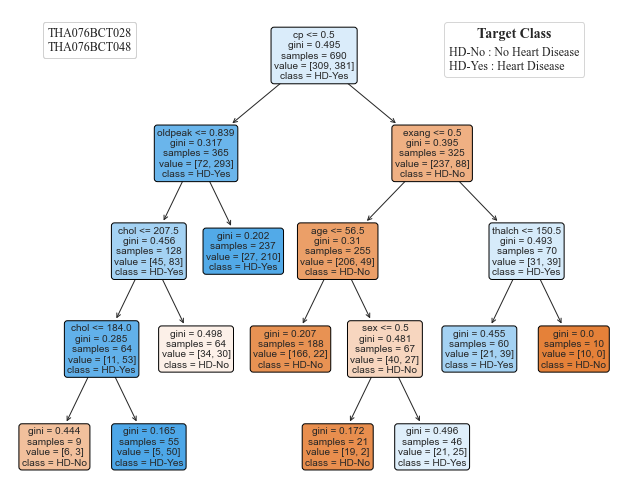

In [1153]:
font = FontProperties(family='Times New Roman', size = 12)
font_label = FontProperties(family='Times New Roman', size = 14, weight = "bold")
font_xticks = FontProperties(family='Times New Roman', size = 12)
font_yticks = FontProperties(family='Times New Roman', size = 12)

ax = plt.figure(figsize=(11, 9))
# plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
features = X.columns
classes = ['HD-No','HD-Yes']

tr.plot_tree(
    clf_after_prune_gini,
    filled=True,
    rounded=True,
    feature_names=features,
    class_names=classes,
    fontsize = 10
)


legend_1 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['HD-No : No Heart Disease\nHD-Yes : Heart Disease'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_1.set_bbox_to_anchor((0.95, 0.98))
legend_1.set_title("Target Class", prop=font_label) 
ax.add_artist(legend_1)

    
legend_2 = plt.legend([plt.Line2D([], [], linestyle='none', marker=None, color='none')], ['THA076BCT028\nTHA076BCT048'], handlelength=0, handletextpad=0, fancybox=True, prop=font, frameon = True)
legend_2.set_bbox_to_anchor((0.22, 0.98))
ax.add_artist(legend_2)

plt.savefig("./Figures/pruned_gini_tree.png", dpi = 300, bbox_inches = 'tight')
plt.show()

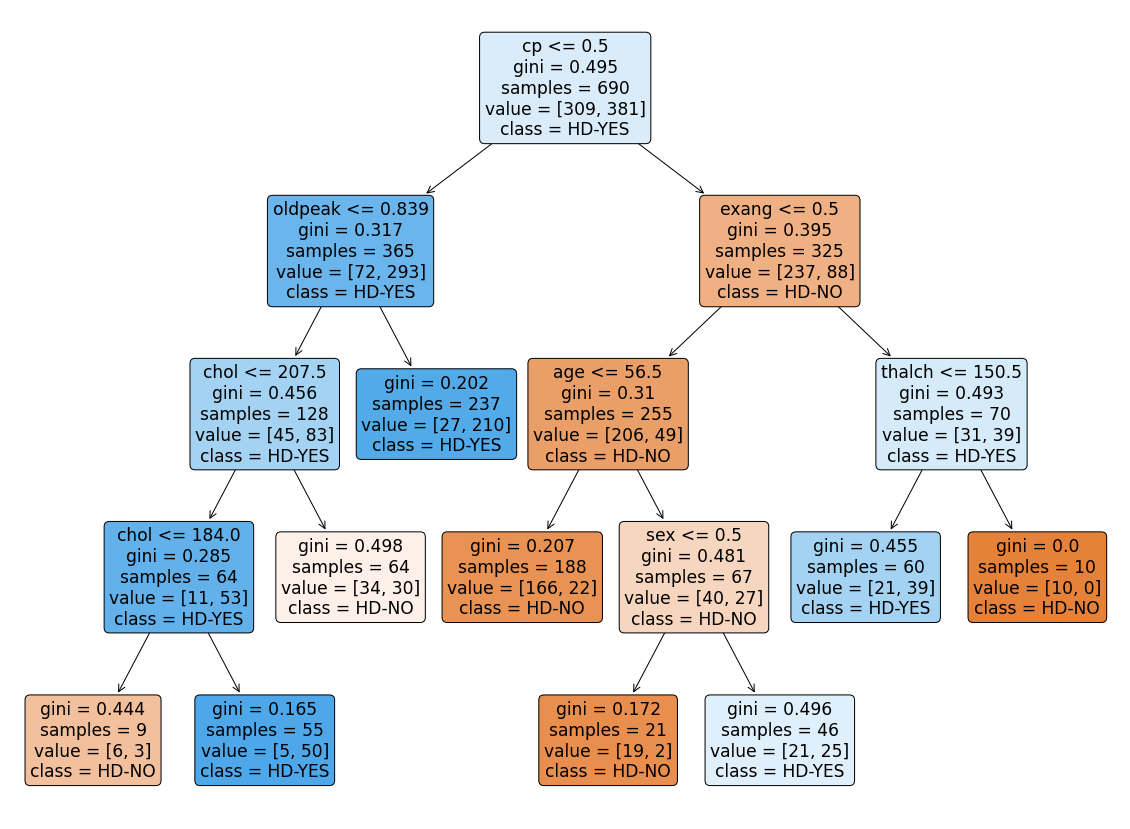

In [947]:
plt.figure(figsize=(20,15))
features = X.columns
classes = ['HD-NO','HD-YES']
tr.plot_tree(clf_after_prune_gini, feature_names=features, class_names=classes,filled=True, rounded = True)
plt.show()

<br> In conclusion from using decision tree, what we get is that the accuracy is not more then 77% in any possible. 

### Lets use Logistic Regression on this dataset 

In [970]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [971]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [976]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [977]:
X_test_scaled = scaler.transform(X_test)
y_pred_lr = lr_classifier.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_true = y_test, y_pred = y_pred_lr) * 100:.2f}%")
print(f"Accuracy: {accuracy_score(y_true = y_train, y_pred = lr_classifier.predict(X_train_scaled)) * 100:.2f}%")

Accuracy: 76.96%
Accuracy: 79.57%


In [1154]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.79      0.80      0.79       128

    accuracy                           0.77       230
   macro avg       0.77      0.77      0.77       230
weighted avg       0.77      0.77      0.77       230



In [1155]:
classification_rep = classification_report(y_test, y_pred = y_pred_lr, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
#     if key not in ['accuracy', 'macro avg', 'weighted avg']:
    if key == 'accuracy':
        print(value)
    if not isinstance(value, float):
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df.to_excel('logistic_regression.xlsx', index=True)

0.7695652173913043


In [979]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred_svm = svm_classifier.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_true = y_test, y_pred = y_pred_svm) * 100:.2f}%")
print(f"Accuracy: {accuracy_score(y_true = y_train, y_pred = svm_classifier.predict(X_train_scaled)) * 100:.2f}%")

Accuracy: 76.52%
Accuracy: 86.52%


Its is normal to have decision tree accuracy greater than the logistic regression, and this is actually due to complex relationships between the different features and the target variable and non-linear relationships between them. 